# Trabalho de projeto final do curso de Introdução à Programação em Python
## Tema: Dados do IBGE para análise dos dados populacionais dos municípios do RJ
### Professor: Bruno Silva
### Integrantes do grupo:
- Carolina Haber
- Giovanni Angelo
- Pedro Weyne
- Rafael Oliveira

In [9]:
# Para conseguir utilizar as variáveis do Python dentro dos blocos de markdowns
# foi necessário habilitar a nbextension chamada Python Markdown
# 
# Além disso para que a exportação tivesse o mesmo comportamento, foi necessário
# criar um arquivo jupyter_notebook_config.py na pasta .jupyter com a linha:
# c.Exporter.preprocessors = ['jupyter_contrib_nbextensions.nbconvert_support.PyMarkdownPreprocessor']

# Dados

Para o nosso projeto foram utilizados os indicadores disponibilizados pelo portal [Cidades@](https://cidades.ibge.gov.br/) e pela [Lista de Municípios](https://ibge.gov.br/explica/codigos-dos-municipios.php), ambos disponibilizados pelo IBGE.

>O Cidades@ é o sistema agregador de informações do IBGE sobre os municípios e estados do Brasil. Aqui você pode encontrar as pesquisas do IBGE, infográficos e mapas. Além disso pode comparar os indicadores entre municípios e estados.

Percebemos que o endereço utilizado pelo portal Cidades@ utiliza uma padronização País / Estado / Município / panorama, como no exemplo de Niterói: https://cidades.ibge.gov.br/brasil/rj/niteroi/panorama

E por isso optamos por obter os dados utilizando Web Scrapping:
1. Obtivemos o nome de todos os municípios do RJ pela Lista de Municípios
2. Utilizamos esse nome para compor o endereço e buscar os indicadores por município no Cidades@

In [10]:
import pandas as pd
import sqlite3 as sql
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
Endereco = Path.cwd()

BD = Endereco / 'projeto.db'

print("Conectando no banco de dados...")
ConexaoBD = sql.connect(BD)

print("Lendo os dados da Tabela")
indicadores = pd.read_sql('SELECT * FROM indicadores_ibge_municipios', ConexaoBD)

print("Foram recuperados", indicadores.shape[0], "linhas e", indicadores.shape[1], "colunas")


totalIndicadores = indicadores.shape[0]
totalMunicipios = indicadores.shape[1] - 2 #Removendo a coluna id e indicadores

Conectando no banco de dados...
Lendo os dados da Tabela
Foram recuperados 29 linhas e 94 colunas


# Resumos dos dados

Obtivemos {{totalIndicadores}} indicadores referentes aos {{totalMunicipios}} municípios do estado do Rio de Janeiro.



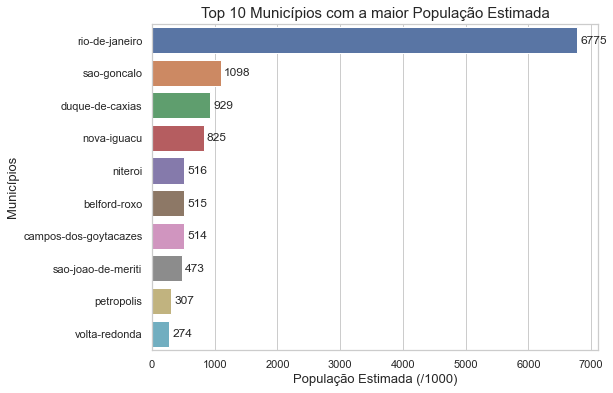

In [12]:
pop_est = indicadores.copy()
pop_est.index = pop_est.indicador
pop_est.drop(columns=['id','indicador'], inplace=True)
pop_est = pop_est.transpose()[['População estimada [2021]']].sort_values(by='População estimada [2021]',ascending=False).head(10)

y = pop_est.index
x = pop_est['População estimada [2021]'].values/1000

fig, ax = plt.subplots(figsize=(8,6))

sns.set_theme(style="whitegrid")
ax = sns.barplot(x=x, y=y)
plt.ticklabel_format(style='plain', axis='x')
ax.set_xlabel('População Estimada (/1000)',fontsize=13)  
ax.set_ylabel('Municípios',fontsize=13)  
ax.set_title("Top 10 Municípios com a maior População Estimada",fontsize=15)  

for p in ax.patches:
    width = p.get_width()
    ax.text(p.get_width()+50,
            p.get_y()+p.get_height()/2,
            int(width),
            va="center")

# Municípios com a maior população estimada
{{fig}}

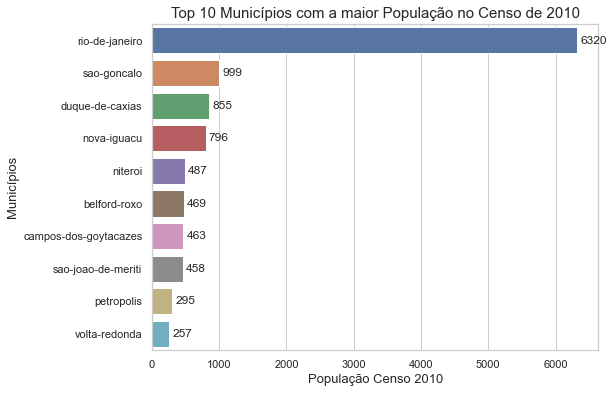

In [13]:
pop_2010 = indicadores.copy()
pop_2010.index = pop_2010.indicador
pop_2010.drop(columns=['id','indicador'], inplace=True)
pop_2010 = pop_2010.transpose()[['População no último censo [2010]']].sort_values(by='População no último censo [2010]',ascending=False).head(10)

y = pop_2010.index
x = pop_2010['População no último censo [2010]'].values/1000

fig, ax = plt.subplots(figsize=(8,6))

sns.set_theme(style="whitegrid")
ax = sns.barplot(x=x, y=y)
plt.ticklabel_format(style='plain', axis='x')
ax.set_xlabel('População Censo 2010',fontsize=13)  
ax.set_ylabel('Municípios',fontsize=13)  
ax.set_title("Top 10 Municípios com a maior População no Censo de 2010",fontsize=15)  

for p in ax.patches:
    width = p.get_width()
    ax.text(p.get_width()+50,
            p.get_y()+p.get_height()/2,
            int(width),
            va="center")


# Municípios com a maior População no Censo de 2010
{{fig}}

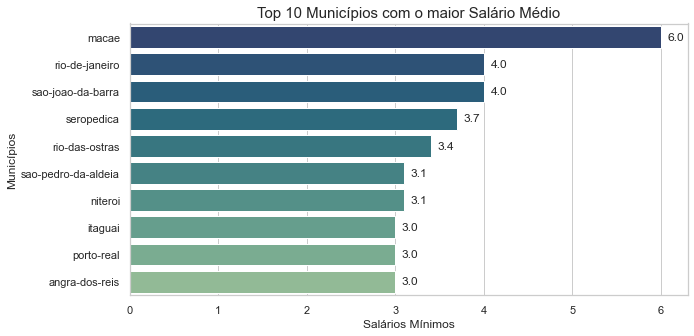

In [14]:
sal_med = indicadores.copy()
sal_med.index = sal_med.indicador
sal_med.drop(columns=['id','indicador'], inplace=True)
sal_med = sal_med.transpose()[['Salário médio mensal dos trabalhadores formais [2020]']].sort_values(by='Salário médio mensal dos trabalhadores formais [2020]',ascending=False).head(10)

y = sal_med.index
x = sal_med['Salário médio mensal dos trabalhadores formais [2020]'].values

fig, ax = plt.subplots(figsize=(10,5))

sns.set_theme(style="whitegrid")
ax = sns.barplot(x=x, y=y ,palette='crest_r')
plt.ticklabel_format(style='plain', axis='x')
ax.set_xlabel('Salários Mínimos',fontsize=12)  
ax.set_ylabel('Municípios',fontsize=12)  
ax.set_title("Top 10 Municípios com o maior Salário Médio",fontsize=15)  

for p in ax.patches:
    width = p.get_width()
    ax.text(p.get_width()+0.075,
           p.get_y()+p.get_height()/2,
           width,
           va="center")

# Municípios com o maior Salário Médio
{{fig}}

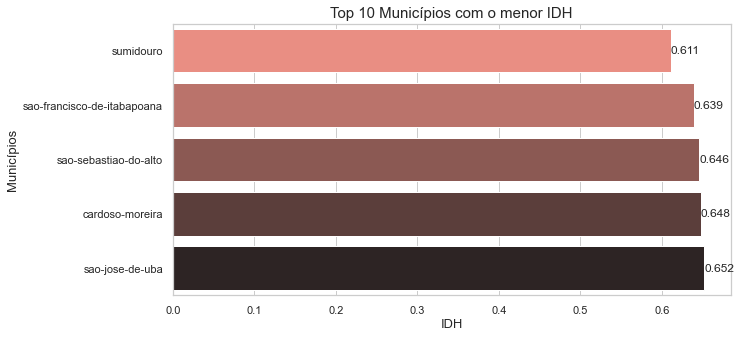

In [15]:
idh = indicadores.copy()
idh.index = idh.indicador
idh.drop(columns=['id','indicador'], inplace=True)
idh = idh.transpose()[['Índice de Desenvolvimento Humano Municipal (IDHM) [2010]']].sort_values(by='Índice de Desenvolvimento Humano Municipal (IDHM) [2010]',ascending=True).head(10)

y = idh.index
x = idh['Índice de Desenvolvimento Humano Municipal (IDHM) [2010]'].values

fig, ax = plt.subplots(figsize=(10,5))

sns.set_theme(style="whitegrid")

ax = sns.barplot(x=x, y=y ,palette='dark:salmon_r')
ax.set_xlabel('IDH',fontsize=13)  
ax.set_ylabel('Municípios',fontsize=13)  
ax.set_title("Top 10 Municípios com o menor IDH",fontsize=15)  

for p in ax.patches:
    width = p.get_width()
    ax.text(p.get_width(),
           p.get_y()+p.get_height()/2,
           width,
           va="center")

# Municípios com o menor IDH
{{fig}}

# Obrigado

## Dúvidas ou comentários?